### **Data Science**
*by Bruno Guarda*   
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white">](https://linkedin.com/in/bruno-guarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white">](https://medium.com/@bsguarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white">](
https://github.com/bsguarda)

___

# Web Scraping
______

<center><img alt="Colaboratory logo" width="60%" src="https://raw.githubusercontent.com/bsguarda/web_scraping/main/WEB%20SCRAPING.jpg"></center>



O termo Web Scraping ou "raspagem de dados" está associado a uma forma de mineração de dados na web que permite a extração de dados de sites, plataformas, online, redes sociais entre outros que estão publicamente acessíveis, transformando esses dados em informação estruturada para analises que geram insights valiosos.

Essa "raspagem" pode ser feita de forma automatizada através de frameworks tanto no Python, como é o caso do [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) que será usado nesse projeto, como em outra linguagem de programação e inclusive pode ser feita até pelo Excel.

___
### Fluxo de Raspagem de Dados


<center><img alt="Colaboratory logo" width="40%" src="https://raw.githubusercontent.com/bsguarda/web_scraping/main/web_scraping_flow.png"></center>

Basicamente o fluxo da raspagem é feita dessa forma:

* *Identifica o site de destino*
* *Coleta URLs das páginas de onde você deseja extrair dados*
* *Faz uma solicitação a esses URLs para obter o HTML da página*
* *Usa localizadores para encontrar os dados no HTML*
* *Salva os dados em um arquivo JSON ou CSV ou algum outro formato estruturado*


___
# Web Scraping em dados de Fundos Imobiliários (FIIs)


O fundo imobiliário é uma espécie de “condomínio” de investidores, que reúnem seus recursos para que sejam aplicados em conjunto no mercado imobiliário. A dinâmica mais tradicional é que o dinheiro seja usado na construção ou na aquisição de imóveis, que depois sejam locados ou arrendados. Os ganhos obtidos com essas operações são divididos entre os participantes, na proporção em que cada um aplicou.

Fundos imobiliários são classificados em alguns grupos diferentes:

* Fundos de tijolo (ou de renda): São os que investem em ativos reais – ou seja, em imóveis de fato;

* Fundos de papel (ou de recebíveis): Esses fundos compram títulos ligados ao mercado imobiliário, no lugar dos imóveis em si;

* Fundos híbridos: Mesclam, na carteira, tanto papéis do segmento imobiliário (outros fundos imobiliários, LCIs, CRIs e entre outros) quanto investimentos em imóveis diretamente.

Será utilizado os dados do site [Fundamentos](https://www.fundamentus.com.br/), que é um sistema on-line que disponibiliza informações financeiras e fundamentalistas das empresas com ações listadas na Bovespa e que possui completo banco de dados apresentado de forma acessível para auxiliar
o investidor a encontrar as melhores opções de investimento.


In [27]:
#importando as bibliotecas
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')


!pip install requests-html --quiet

___
### Coletando dados do site

In [106]:
#url do site que será feita a coleta dos dados
url = 'https://www.fundamentus.com.br/fii_resultado.php'

#simulação de conexão comum evitando que sistema do site entenda que é um bot bloqueando o acesso
headers = { 
    'User-Agent'      : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36', 
    'Accept'          : 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8', 
    'Accept-Language' : 'en-US,en;q=0.5',
    'DNT'             : '1', 
    'Connection'      : 'close'
}

#requisição no site
data = requests.get(url, headers=headers, timeout=6).text

#coletando o html
soup = BeautifulSoup(data, "html.parser")

#atribuindo a variável tabela
tabela = soup.find('table')

Será criado um Data Frame com as mesma colunas que estão no site para ser feito a concatenação dos dados com suas respectivas colunas.

In [107]:
#criando o Data Frame
df = pd.DataFrame(columns=['Papel', 'Segmento', 'Cotacao', 'FFO Yield %', 
                 'Dividend Yield %', 'P/VP', 'Valor de Mercado', 'Liquidez',
                 'Qtd de Imoveis', 'Preco do m2', 'Aluguel por m2', 'Cap Rate %', 'Vacancia Media %'])

df.head()                 

,Papel,Segmento,Cotacao,FFO Yield %,Dividend Yield %,P/VP,Valor de Mercado,Liquidez,Qtd de Imoveis,Preco do m2,Aluguel por m2,Cap Rate %,Vacancia Media %


Agora será atribuído os valores a cada colunam, utilizando um laço for dentro do html buscando e incluindo em uma lista a tag <tr> que representa cada linha da tabela e <td> que representa cada coluna.

In [108]:
for row in tabela.tbody.find_all('tr'): # a tag <tr> 
    #buscando todas as colunas de cada linha
    columns = row.find_all('td')  # a tag <td> 
    if(columns != []):
        papel = columns[0].text.strip(' ')
        segmento = columns[1].text.strip(' ')
        cotacao = columns[2].text.strip(' ')
        ffo_yield = columns[3].text.strip(' ')
        dividend_yield = columns[4].text.strip(' ')
        p_vp = columns[5].text.strip(' ')
        valor_de_mercado = columns[6].text.strip(' ')
        liquidez = columns[7].text.strip(' ')
        qtd_de_imoveis = columns[8].text.strip(' ')
        preco_do_m2 = columns[9].text.strip(' ')
        aluguel_por_m2 = columns[10].text.strip(' ')
        cap_rate = columns[11].text.strip(' ')
        vacancia_media = columns[12].text.strip(' ')
        #concatendo o Data Frame criado com as colunas que foram atribuídas a suas colunas
        df = pd.concat([df, pd.DataFrame.from_records([{'Papel':papel, 'Segmento': segmento, 'Cotacao': cotacao, 'FFO Yield %': ffo_yield,
                                                         'Dividend Yield %': dividend_yield, 'P/VP': p_vp, 'Valor de Mercado': valor_de_mercado,
                                                         'Liquidez': liquidez, 'Qtd de Imoveis': qtd_de_imoveis, 'Preco do m2': preco_do_m2,
                                                          'Aluguel por m2': aluguel_por_m2, 'Cap Rate %': cap_rate, 'Vacancia Media %': vacancia_media}])],
                                                           ignore_index=True)

df.head()                 

,Papel,Segmento,Cotacao,FFO Yield %,Dividend Yield %,P/VP,Valor de Mercado,Liquidez,Qtd de Imoveis,Preco do m2,Aluguel por m2,Cap Rate %,Vacancia Media %
0,AAZQ11,Títulos e Val. Mob.,"9,58","0,00%","2,26%","1,00",230.277.000,347.180,0,"0,00","0,00","0,00%","0,00%"
1,ABCP11,Shoppings,"65,63","27,85%","9,04%","0,72",309.057.000,86.388,1,"3.566,61","1.126,44","31,58%","3,95%"
2,AEFI11,Outros,"174,90","7,35%","0,00%","1,21",393.647.000,0,7,"5.033,90","341,65","6,79%","0,00%"
3,AFCR11,Híbrido,"103,15","11,91%","0,00%","1,00",186.437.000,0,0,"0,00","0,00","0,00%","0,00%"
4,AFHI11,Títulos e Val. Mob.,"94,24","8,59%","15,04%","0,99",284.553.000,731.334,0,"0,00","0,00","0,00%","0,00%"


___
### Verificando os tipos dos dados


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Papel             391 non-null    object
 1   Segmento          391 non-null    object
 2   Cotacao           391 non-null    object
 3   FFO Yield %       391 non-null    object
 4   Dividend Yield %  391 non-null    object
 5   P/VP              391 non-null    object
 6   Valor de Mercado  391 non-null    object
 7   Liquidez          391 non-null    object
 8   Qtd de Imoveis    391 non-null    object
 9   Preco do m2       391 non-null    object
 10  Aluguel por m2    391 non-null    object
 11  Cap Rate %        391 non-null    object
 12  Vacancia Media %  391 non-null    object
dtypes: object(13)
memory usage: 39.8+ KB


Podemos visualizar que algumas colunas tem os dados com ',' para fazer a divisão decimal e utiliza 2 "." no mesmo dado e isso irá dificultar no momento da análise desses dados e também podemos verificar que todas a colunas estão como objeto (str). Será feito um tratamento nesses dados para facilitar a visualização e posterior análise.

___
### Tratamento dos dados

In [110]:
#tratando os dados

#tratando a coluna cotação
df['Cotacao'] = df['Cotacao'].apply(lambda x: float(x.replace('.','').replace(',','.')))

#tratando a coluna FFO Yield
df['FFO Yield %'] = df['FFO Yield %'].apply(lambda x: float(x.replace('.', '').replace(',', '.').replace('%', '')))

#tratando a coluna Dividend Yield
df['Dividend Yield %'] = df['Dividend Yield %'].apply(lambda x: float(x.replace('.', '').replace(',', '.').replace('%', '')))

#tratando a coluna P/VP
df['P/VP'] = df['P/VP'].apply(lambda x: float(x.replace('.','').replace(',','.')))

#tratando a coluna Valor de Mercado
df['Valor de Mercado'] = df['Valor de Mercado'].apply(lambda x: round(float(x.replace('.','').replace(',','.'))))

#tratando a coluna Liquidez
df['Liquidez'] = df['Liquidez'].apply(lambda x: round(float(x.replace('.','').replace(',','.'))))

#tratando a coluna Qtd de Imoveis
df['Qtd de Imoveis'] = df['Qtd de Imoveis'].apply(lambda x: float(x))

#tratando a coluna Preco do m2
df['Preco do m2'] = df['Preco do m2'].apply(lambda x: float(x.replace('.','').replace(',','.')))

#tratando a coluna Aluguel por m2
df['Aluguel por m2'] = df['Aluguel por m2'].apply(lambda x: float(x.replace('.','').replace(',','.')))

#tratando a coluna Cap Rate %
df['Cap Rate %'] = df['Cap Rate %'].apply(lambda x: float(x.replace('.', '').replace(',', '.').replace('%', '')))

#tratando a coluna Vacancia Media %
df['Vacancia Media %'] = df['Vacancia Media %'].apply(lambda x: float(x.replace('.', '').replace(',', '.').replace('%', '')))



In [111]:
#verificando as primeiras linhas
df.head()

,Papel,Segmento,Cotacao,FFO Yield %,Dividend Yield %,P/VP,Valor de Mercado,Liquidez,Qtd de Imoveis,Preco do m2,Aluguel por m2,Cap Rate %,Vacancia Media %
0,AAZQ11,Títulos e Val. Mob.,9.580,0.000,2.260,1.000,230277000,347180,0.000,0.000,0.000,0.000,0.000
1,ABCP11,Shoppings,65.630,27.850,9.040,0.720,309057000,86388,1.000,3566.610,1126.440,31.580,3.950
2,AEFI11,Outros,174.900,7.350,0.000,1.210,393647000,0,7.000,5033.900,341.650,6.790,0.000
3,AFCR11,Híbrido,103.150,11.910,0.000,1.000,186437000,0,0.000,0.000,0.000,0.000,0.000
4,AFHI11,Títulos e Val. Mob.,94.240,8.590,15.040,0.990,284553000,731334,0.000,0.000,0.000,0.000,0.000


In [112]:
#verificando as informações do data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Papel             391 non-null    object 
 1   Segmento          391 non-null    object 
 2   Cotacao           391 non-null    float64
 3   FFO Yield %       391 non-null    float64
 4   Dividend Yield %  391 non-null    float64
 5   P/VP              391 non-null    float64
 6   Valor de Mercado  391 non-null    int64  
 7   Liquidez          391 non-null    int64  
 8   Qtd de Imoveis    391 non-null    float64
 9   Preco do m2       391 non-null    float64
 10  Aluguel por m2    391 non-null    float64
 11  Cap Rate %        391 non-null    float64
 12  Vacancia Media %  391 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 39.8+ KB


Podemos verificar agora que todas as mudanças nos valores foram feitas com sucesso e as mudanças dos tipos das colunas também estão de acordo com o que representa cada dado em sua respectiva coluna.

___
## Composição dos Indicadores dos FIIs

* *Papel* - Nome atribuído ao FII;

* *Segmento* - Em qual segmento esse Fundo está alocado;

* *Cotação* - Valor de uma cota de um FII;

* *FFO Yield %* - É o fluxo de caixa proveniente das operações;

* *Dividend Yield* - É o rendimento do dividendo do FII;

* *P/PV* - Representa o patrimônio líquido do FII (o caixa e os imóveis) dividido pela quantidade de cotas que o fundo possui no mercado;

* *Valor de Mercado* - Representa o valor de avaliação dos ativos de determinado FII;

* *Liquidez* - É a capacidade de transformar um FII em dinheiro durante o período de um dia;

* *Qtd de Imóveis* - Quantidade de imoveis que compõe aquele determinado FII.

* *Preço do m²* - Valor do m² de um determinado FII;

* *Aluguel por m²* - Valor de aluguel do m² de um determinado FII;

* *Cap Rate* - É a relação entre a renda anual produzida por um ativo imobiliário e seu valor atual de mercado;

* *Vacância Média* - Representa o percentual de espaço desocupado dos empreendimentos em relação à área bruta locável (ABL) total do FII



___
## Insights  

Com esses dados bem definidos e tratados, através de analise exploratória, será respondida os seguintes questionamentos:

1 - Quantos papeis de FIIs existem?

2 - Quantos e quais são os tipos segmentos existem nos FIIs?

3 - Qual as 10 maiores e menores cotações dos FIIs?

4 - Quais FIIs tem os maiores dividendos e qual a média?

5 - Qual FII tem o maior e menor FFO Yield (Fluxo de caixa)?

6 - Qual FII tem o maior e menor valor de mercado e qual o valor médio?

7 - Qual FII tem a maior liquidez e qual a média de liquidez do FIIs?

8 - Os 10 FIIs de maiores cotações também são os que pagam os maiores dividendos?

9 - O FII com o maior valor de mercado é o que tem o maior fluxo de caixa?

10 - O FII com maior valor de mercado é o que tem a maior liquidez?

___
### 1 - Quantos papeis de FIIs existem?

In [191]:
print('\nExistem {} papeis FIIs'.format(df['Papel'].count()))


Existem 391 papeis FIIs


___
### 2 - Quantos e quais são os tipos segmentos existem nos FIIs?

In [114]:
print('Existem {} tipos de segmentos FIIs\n'.format(df['Segmento'].value_counts().count()))
print('São eles: \n\n{}'.format(df['Segmento'].value_counts()))

Existem 10 tipos de segmentos FIIs

São eles: 

Títulos e Val. Mob.    134
Híbrido                 90
Lajes Corporativas      52
Outros                  40
Shoppings               26
Logística               25
Residencial             16
Hospital                 5
Hotel                    2
                         1
Name: Segmento, dtype: int64


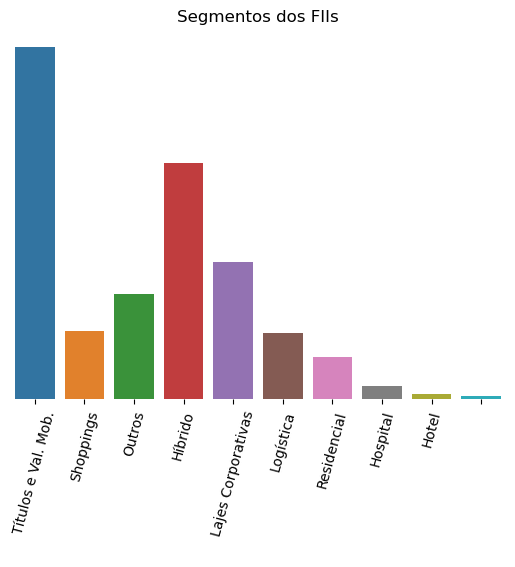

In [115]:
#plotando o gráfico com a contagem dos segmentos
segmento_plot = sns.countplot(df['Segmento'])
plt.title('Segmentos dos FIIs')
segmento_plot.get_yaxis().set_visible(False)
plt.xticks(rotation=75)
for x in ['top', 'bottom', 'right', 'left']:
    segmento_plot.spines[x].set_visible(False)
segmento_plot.set_xlabel(' ')
plt.show()    

Existe um registro sem nomenclatura então será considerado como `Outros`, podemos afirmar então que existem 9 tipos de segmentos de FIIs

___
### 3 - Qual as 10 maiores e menores cotações dos FIIs?

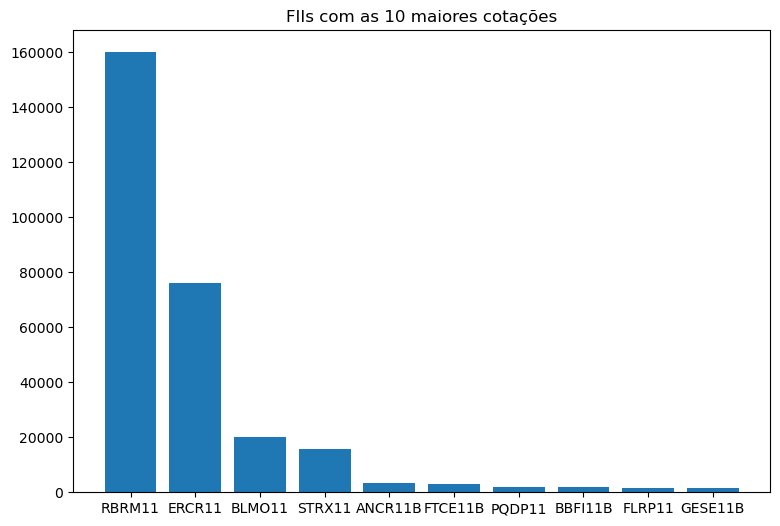

In [116]:
#FIIs com as 10 maiores cotações
cotacao_top10 = df[['Papel', 'Cotacao']].sort_values(by='Cotacao', ascending=False)[0:10]
cotacao_top10

#plotando o gráfico
plt.figure(figsize=(9,6))
plt.bar(cotacao_top10['Papel'], cotacao_top10['Cotacao'])
plt.title('FIIs com as 10 maiores cotações')
plt.show()

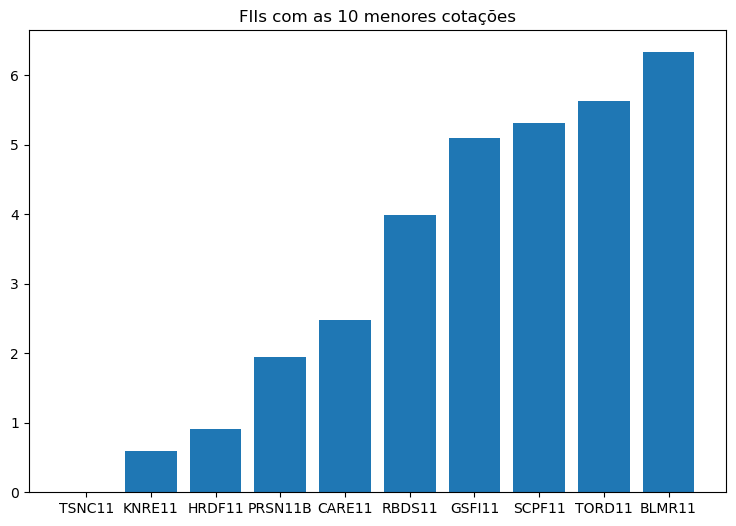

In [117]:
#FIIs com as 10 menores cotações
cotacao_top10_m = df[['Papel', 'Cotacao']].sort_values(by='Cotacao')[0:10]

#plotando o gráfico
plt.figure(figsize=(9,6))
cotacao_top10_m_plot= plt.bar(cotacao_top10_m['Papel'], cotacao_top10_m['Cotacao'])
plt.title('FIIs com as 10 menores cotações')
plt.show()              

___
### 4 - Quais FIIs tem os maiores dividendos e qual a média?

In [118]:
#filtrando os Top 10 em dividendos
top_div = df[['Papel','Dividend Yield %']].sort_values(by='Dividend Yield %', ascending=False)[0:10]

#setando as casas decimais
pd.set_option('float_format', '{:.3f}'.format)

print('A média dos dividendos é de {}\n\nOs FIIs com os maiores dividendos são:'. format(df['Dividend Yield %'].mean()))

top_div

A média dos dividendos é de 4183463.7653708435

Os FIIs com os maiores dividendos são:


,Papel,Dividend Yield %
347,TSNC11,1635730000.000
55,BVAR11,351.610
169,IDFI11,92.630
295,RDPD11,85.390
303,RNDP11,84.210
189,KINP11,69.680
170,IDGR11,64.330
196,KNRE11,52.300
299,REIT11,51.240
253,PLRI11,37.710


Podemos verificar que o valor de dividendo mais alto está muito discrepante e podemos considera-lo como um outlier. Será imputado nele a média de todos os outros valores para chegarmos a um valor mais palpável

In [119]:
#calculando a média 
media_div = df[['Papel','Dividend Yield %']].sort_values(by='Dividend Yield %', ascending=False)[1:].mean()

#modificando o Papel TSNC11 que está na linha 347 e coluna 4 para a média com a função iat.
df.iat[347, 4] = media_div

In [126]:
#verificando novamente após as modificações
top_div = df[['Papel','Dividend Yield %']].sort_values(by='Dividend Yield %', ascending=False)[0:10]

#média
print('A média dos dividendos é de {:.4f}\n\nOs FIIs com os maiores dividendos são:'. format(df['Dividend Yield %'].mean()))

top_div

A média dos dividendos é de 11.1084

Os FIIs com os maiores dividendos são:


,Papel,Dividend Yield %
55,BVAR11,351.610
169,IDFI11,92.630
295,RDPD11,85.390
303,RNDP11,84.210
189,KINP11,69.680
170,IDGR11,64.330
196,KNRE11,52.300
299,REIT11,51.240
253,PLRI11,37.710
76,CXTL11,35.480


___
### 5 - Qual FII tem o maior e menor FFO Yield (Fluxo de caixa)?

In [135]:
print('O FII com o maior Fluxo de Caixa é o:\n\n{}'.format(df[['Papel','FFO Yield %']].max()))
print('\n\nO FII com o menor Fluxo de Caixa é o:\n\n{}'.format(df[['Papel','FFO Yield %']].min()))

O FII com o maior Fluxo de Caixa é o:

Papel            ZIFI11
FFO Yield %   91706.560
dtype: object


O FII com o menor Fluxo de Caixa é o:

Papel           AAZQ11
FFO Yield %   -758.500
dtype: object


____
### 6 - Qual FII tem o maior e menor valor de mercado e qual o valor médio?

In [144]:
print('O FII que tem o maior Valor de Mercado é:\n\n{}'.format(df[['Papel', 'Valor de Mercado']].max()))
print('\n\nO FII que tem o menor Valor de Mercado é:\n\n{}\n\n'.format(df[['Papel', 'Valor de Mercado']].min()))
print('O Valor de Mercado médio é: {:.2f}'.format(df['Valor de Mercado'].mean()))

O FII que tem o maior Valor de Mercado é:

Papel                    ZIFI11
Valor de Mercado    25520000000
dtype: object


O FII que tem o menor Valor de Mercado é:

Papel               AAZQ11
Valor de Mercado         0
dtype: object


O Valor de Mercado médio é: 520163577.23


___
### 7 - Qual FII tem a maior liquidez e qual a média de liquidez do FIIs?

In [153]:
print('O FII com maior liquidez é:\n\n{}'.format(df[['Papel', 'Liquidez']].max()))
print('\n\nA média da Liquidez dos FIIs é de:\n\n{:.2f}'.format(df['Liquidez'].mean()))

O FII com maior liquidez é:

Papel         ZIFI11
Liquidez    11639100
dtype: object


A média da Liquidez dos FIIs é de:

595785.60


___
### 8 - Os 10 FIIs de maiores cotações também são os que pagam os maiores dividendos?

In [174]:
#concatenando os dois filtros
pd.concat([top_div, cotacao_top10])

,Papel,Dividend Yield %,Cotacao
55,BVAR11,351.610,NaN
169,IDFI11,92.630,NaN
295,RDPD11,85.390,NaN
303,RNDP11,84.210,NaN
189,KINP11,69.680,NaN
170,IDGR11,64.330,NaN
196,KNRE11,52.300,NaN
299,REIT11,51.240,NaN
253,PLRI11,37.710,NaN
76,CXTL11,35.480,NaN


Podemos observar que nenhum dos dois filtros tem Papeis em comum, ou seja, não existe relação entre os FIIs de maiores cotações serem os de maiores dividendos.

___
### 9 - O FII com o maior valor de mercado é o que tem o maior fluxo de caixa?

In [189]:
print('O FII com o maior valor de mercado é:\n\n{}'.format(df[['Papel', 'Valor de Mercado']].max()))
print('\n\nO FII com o maior fluxo de caixa é:\n\n{}'.format(df[['Papel', 'FFO Yield %']].max()))

O FII com o maior valor de mercado é:

Papel                    ZIFI11
Valor de Mercado    25520000000
dtype: object


O FII com o maior fluxo de caixa é:

Papel            ZIFI11
FFO Yield %   91706.560
dtype: object


Podemos observar que o Papel `ZIFI11` tem o maior valor de mercado e também o maior fluxo de caixa.

___
### 10 - O FII com maior valor de mercado é o que tem a maior liquidez?

In [190]:
print('O FII com o maior valor de mercado é:\n\n{}'.format(df[['Papel','Valor de Mercado']].max()))
print('\n\nO FII com o maior liquidez é:\n\n{}'.format(df[['Papel','Liquidez']].max()))

O FII com o maior valor de mercado é:

Papel                    ZIFI11
Valor de Mercado    25520000000
dtype: object


O FII com o maior liquidez é:

Papel         ZIFI11
Liquidez    11639100
dtype: object


Podemos observar que o papel `ZIFI11` além de ter o maior valor de mercado e o maior fluxo de caixa, tem também a maior liquidez.

___
## Conclusão

Existem diversas formas de fazer essa coleta, pois cada site é construído de uma forma e cada um tem uma estrutura de html diferente, o que pode tornar essa coleta mais fácil e mais difícil.

Pudemos verificar o poder que essa ferramenta tem, tendo em vista que temos milhares de sites, plataformas e redes sociais com mais dos variados tipos e quantidades de dados e que podem ser coletados e utilizado a nossa favor gerando valor através de analises podendo até ser utilizado modelos de Machine Learning. 